<a href="https://colab.research.google.com/github/Pouyaaskari/Car-Brand-classification-with-Resnet50/blob/master/Car_brand_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #0-Dataset have 3 labels and is available in my google drive

In [2]:
!unzip /content/Deep-Learning-Car-Brand/Datasets.zip

Archive:  /content/Deep-Learning-Car-Brand/Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.j

#1-Import necessary libraries

In [50]:
import tensorflow as tf
from keras.layers import Input,Lambda,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from tensorflow.keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#2-load data and resnet weights

In [40]:
image_size=[224,224]
folder=glob("/content/drive/MyDrive/Colab Notebooks/Datasets/Train/*")

train="/content/drive/MyDrive/Colab Notebooks/Datasets/Train"
test="/content/drive/MyDrive/Colab Notebooks/Datasets/Test"

resnet=ResNet50(input_shape=image_size+[3],weights="imagenet",include_top=False)

for layer in resnet.layers:
  layer.trainable=False

#3-make our model

In [41]:
x=Flatten()(resnet.output)
x=Dense(10,activation="relu")(x)
output=Dense(len(folder),activation="softmax")(x)

#create our model
model=Model(inputs=resnet.input,outputs=output)

In [42]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

#4-compile our model

In [43]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#5-Let's make more data with Data Augmentation

In [44]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)

In [45]:
train_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Datasets/Train",
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 64 images belonging to 3 classes.


In [46]:
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Datasets/Test",
                                          target_size=(224,224),
                                          batch_size=32,class_mode="categorical")

Found 58 images belonging to 3 classes.


In [47]:
history=model.fit(
    train_set,validation_data=test_set,epochs=100,steps_per_epoch=len(train_set),validation_steps=len(test_set)
)

Epoch 1/100
2/2 [==============================] - 7s 2s/step - loss: 1.9814 - accuracy: 0.3438 - val_loss: 1.1505 - val_accuracy: 0.3276
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 1.0123 - accuracy: 0.4375 - val_loss: 1.0978 - val_accuracy: 0.5172
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 1.0988 - accuracy: 0.2969 - val_loss: 1.0977 - val_accuracy: 0.5172
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 1.0988 - accuracy: 0.2969 - val_loss: 1.0976 - val_accuracy: 0.5172
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 1.0988 - accuracy: 0.2969 - val_loss: 1.0975 - val_accuracy: 0.5172
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 1.0988 - accuracy: 0.2969 - val_loss: 1.0975 - val_accuracy: 0.5172
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 1.0988 - accuracy: 0.2969 - val_loss: 1.0975 - val_accuracy: 0.5172
Epoch 8/100
2/2 [=================

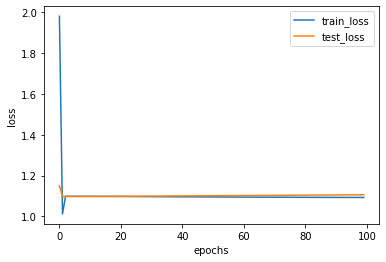

In [48]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="test_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#our dataset is so small and we have a high loss

#6-Save the model

In [51]:
model.save("model.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


#7-Let's do some prediction

In [52]:
pred=model.predict(test_set)
print(pred)

[[0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36312354]
 [0.32261157 0.31426492 0.36

In [54]:
y_pred=np.argmax(pred,axis=1)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [55]:
model=load_model("model.h5")

In [56]:
image=image.load_img("/content/drive/MyDrive/Colab Notebooks/Datasets/Test/mercedes/28.jpg",target_size=(224,224))

In [60]:
x=tf.keras.utils.img_to_array(image)

In [61]:
x.shape

(224, 224, 3)

In [62]:
x=x/255

In [63]:
x=np.expand_dims(x,axis=0)
image=preprocess_input(x)
image.shape

(1, 224, 224, 3)

In [65]:
a=model.predict(image)

In [66]:
b=np.argmax(a,axis=1)

In [67]:
print(b)

[1]
